## Domestic Military Bases for Fiscal Year 2015

We were able to obtain installation range data from a Department of Defense posting on Data.gov.  This is not a historical data set, but will be worth checking out.

Source: https://catalog.data.gov/dataset/military-installations-ranges-and-training-areas

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

None of the formats the pentagon help desk sent me were remotely familiar to me.  I will use python to convert the largest of these files from dbf format into a joined pandas data frame.

In [2]:
from simpledbf import Dbf5

In [3]:
base=Dbf5('MIRTA_Boundaries.dbf')
base=base.to_dataframe()
base.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Army Guard,Orchard Range TS Boise,N/A,Idaho,United States,Active
1,Army Guard,"Fort Pickett, ARNG MTC",N/A,Virginia,United States,Active
2,Army Guard,Camp Dodge Johnston TS,N/A,Iowa,United States,Active
3,Army Guard,NG TS Clark Natl Forest Wappapello,N/A,Missouri,United States,Active
4,Army Guard,CTC Fort Custer Trng Center,N/A,Michigan,United States,Active


This first data frame contains 846 observations and documents the name of the base, operation status, location, and corresponding branch of the military.  I will now load in the second set of military base data I have from the pentagon zip file.

In [4]:
base2=Dbf5('MIRTA_Points.dbf')
base2=base2.to_dataframe()
base2.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,AF Guard,Luis Munoz Marin IAP,N/A,Puerto Rico,Puerto Rico,Active
1,AF Guard,NAS JRB New Orleans,N/A,Louisiana,United States,Active
2,AF Guard,Gulfport-Biloxi Regional Airport (ANG),N/A,Mississippi,United States,Active
3,AF Guard,Jacksonville IAP,N/A,Florida,United States,Active
4,AF Guard,Tucson IAP,N/A,Arizona,United States,Active


This frame follows the same format as the first and adds another 846 observations.  From inspection of the data I believe at least some of these observations to be distinct from the boundaries file.  I will append this second frame onto the first to form one consolidated data set.

In [5]:
base = base.append(base2)
base.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Army Guard,Orchard Range TS Boise,N/A,Idaho,United States,Active
1,Army Guard,"Fort Pickett, ARNG MTC",N/A,Virginia,United States,Active
2,Army Guard,Camp Dodge Johnston TS,N/A,Iowa,United States,Active
3,Army Guard,NG TS Clark Natl Forest Wappapello,N/A,Missouri,United States,Active
4,Army Guard,CTC Fort Custer Trng Center,N/A,Michigan,United States,Active


In [6]:
base=base.reset_index(drop=True)
base.tail()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
1591,AF Active,Los Angeles Air Force Annex No.4,N/A,California,United States,Active
1592,Army Active,Fort Wainwright,N/A,Alaska,United States,Active
1593,Army Active,Fort Stewart,N/A,Georgia,United States,Active
1594,Army Reserve,Fort Hunter Liggett,N/A,California,United States,Active
1595,Army Active,Fort Drum,N/A,New York,United States,Active


In [7]:
base.describe()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
count,1596,1596,1596,1596,1596,1596
unique,10,845,15,53,3,2
top,Navy Active,NAS JRB New Orleans,N/A,California,United States,Active
freq,474,3,1459,174,1524,1510


In [8]:
base['COUNTRY'].value_counts()

United States    1524
Guam               54
Puerto Rico        18
Name: COUNTRY, dtype: int64

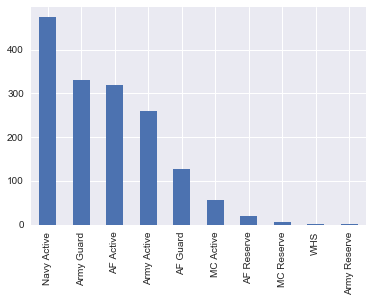

In [9]:
base['COMPONENT'].value_counts().plot(kind='bar')
plt.show()

In [10]:
base=base.sort_values('STATE_TERR').reset_index(drop=True)
base.tail()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
1591,AF Active,F E Warren AFB,N/A,Wyoming,United States,Active
1592,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
1593,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
1594,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active
1595,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active


Looking at this data frame in alphabetical order gives the added benefit of confirming my suspicion of duplicates in the data.  I confirm this by looking at more of the frame.

In [11]:
base

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
2,Army Active,10C Stagefield,N/A,Alabama,United States,Active
3,AF Guard,Montgomery Regional Airport ANGB,N/A,Alabama,United States,Active
4,Navy Active,NOLF Summerdale,N/A,Alabama,United States,Active
5,Navy Active,NOLF Silverhill,N/A,Alabama,United States,Active
6,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
7,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
8,Navy Active,NOLF Brewton,N/A,Alabama,United States,Active
9,Navy Active,Barin Field,N/A,Alabama,United States,Active


Line 0 and line 13 are exactly the same and a cursory glance yields several more examples.  I decide to drop duplicates.  Before I save this change to the original data frame I can take a view of the frame to make sure it does what I want.  Sure enough, the duplicate NOLF Wolf base has been dropped.  I will resave the data frame and reset the index.

In [12]:
base.drop_duplicates().head(15)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
2,Army Active,10C Stagefield,N/A,Alabama,United States,Active
3,AF Guard,Montgomery Regional Airport ANGB,N/A,Alabama,United States,Active
4,Navy Active,NOLF Summerdale,N/A,Alabama,United States,Active
5,Navy Active,NOLF Silverhill,N/A,Alabama,United States,Active
6,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
7,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
8,Navy Active,NOLF Brewton,N/A,Alabama,United States,Active
9,Navy Active,Barin Field,N/A,Alabama,United States,Active


In [13]:
base=base.drop_duplicates().reset_index(drop=True)
base.head(15)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
2,Army Active,10C Stagefield,N/A,Alabama,United States,Active
3,AF Guard,Montgomery Regional Airport ANGB,N/A,Alabama,United States,Active
4,Navy Active,NOLF Summerdale,N/A,Alabama,United States,Active
5,Navy Active,NOLF Silverhill,N/A,Alabama,United States,Active
6,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
7,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
8,Navy Active,NOLF Brewton,N/A,Alabama,United States,Active
9,Navy Active,Barin Field,N/A,Alabama,United States,Active


When I take a tail  of the data frame I can see that the vast majority of the rows added from my second dbf file were duplicates (First data frame had 846 rows each with a unique Site Name).  

In [14]:
base.tail(10)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
840,Navy Active,Allegany Ballistics Lab,N/A,West Virginia,United States,Active
841,Navy Active,NIOC Sugar Grove,N/A,West Virginia,United States,Active
842,AF Guard,Truax ANGB,N/A,Wisconsin,United States,Active
843,Army Guard,Camp Williams Tomah MTA,N/A,Wisconsin,United States,Active
844,Army Active,Badger AAP,N/A,Wisconsin,United States,Inactive
845,AF Guard,Gen Mitchell IAP,N/A,Wisconsin,United States,Active
846,AF Guard,Volk ANGB,N/A,Wisconsin,United States,Active
847,AF Active,F E Warren AFB,N/A,Wyoming,United States,Active
848,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
849,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active


We've got our set so let's export to a csv file.

In [15]:
base.to_csv("base.csv") #saves cleaned data to same folder as notebook

In [16]:
base[base['STATE_TERR']=='Utah'].sort_values('SITE_NAME').reset_index(drop=True)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Army Active,Deseret Chemical Depot,N/A,Utah,United States,Active
1,Army Active,Dugway Proving Ground,N/A,Utah,United States,Active
2,Army Active,Green River Test Complex,N/A,Utah,United States,Active
3,AF Active,Hill AFB,N/A,Utah,United States,Active
4,AF Active,Little Mountain Test Annex,N/A,Utah,United States,Active
5,Army Guard,MTA-L Camp Williams,N/A,Utah,United States,Active
6,Navy Active,NAVPMOSSP Magna Utah,N/A,Utah,United States,Active
7,Army Guard,NG Saint George/FMS,N/A,Utah,United States,Active
8,AF Guard,Salt Lake City IAP,N/A,Utah,United States,Active
9,Army Active,Tooele Army Depot,N/A,Utah,United States,Active


In [17]:
base['STATE_TERR'].value_counts().sort_values()

Wyoming                  3
Delaware                 4
Arkansas                 4
Iowa                     4
New Hampshire            4
Vermont                  5
Wisconsin                5
Montana                  5
Idaho                    6
Connecticut              6
Rhode Island             6
Kentucky                 6
North Dakota             7
District Of Columbia     7
Kansas                   7
South Dakota             7
Michigan                 8
Nebraska                 8
West Virginia            9
Maine                   10
Minnesota               10
Colorado                11
New Jersey              11
Massachusetts           12
Utah                    12
Mississippi             12
Puerto Rico             13
Missouri                13
South Carolina          13
Indiana                 13
Oregon                  13
New Mexico              14
Tennessee               15
Louisiana               15
Ohio                    16
Illinois                16
Oklahoma                16
N

In [18]:
import geopandas as gpd
geobase= gpd.GeoDataFrame.from_file("MIRTA_Points.shp")

In [19]:
geobase

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT,geometry
0,AF Guard,Luis Munoz Marin IAP,N/A,Puerto Rico,Puerto Rico,Active,POINT (-65.99407034547005 18.44391778977422)
1,AF Guard,NAS JRB New Orleans,N/A,Louisiana,United States,Active,POINT (-90.01989651900908 29.83433484217926)
2,AF Guard,Gulfport-Biloxi Regional Airport (ANG),N/A,Mississippi,United States,Active,POINT (-89.0610493431526 30.41068463978434)
3,AF Guard,Jacksonville IAP,N/A,Florida,United States,Active,POINT (-81.70242590173393 30.48867891889705)
4,AF Guard,Tucson IAP,N/A,Arizona,United States,Active,POINT (-110.9493228620604 32.130542403709)
5,AF Guard,Savannah/Hilton Head IAP,N/A,Georgia,United States,Active,POINT (-81.18874488606758 32.13115700669056)
6,AF Guard,Montgomery Regional Airport ANGB,N/A,Alabama,United States,Active,POINT (-86.40026047144357 32.30467579774989)
7,AF Guard,"Jackson IAP, Thompson Field",N/A,Mississippi,United States,Active,POINT (-90.08188723730615 32.32476792929657)
8,AF Guard,Sky Harbor IAP,N/A,Arizona,United States,Active,POINT (-112.0115316864382 33.42599779766027)
9,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active,POINT (-86.75355047947102 33.57070866317434)


In [20]:
#geobase.to_csv("geobase.csv")

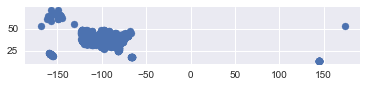

In [21]:
geobase.plot()

In [22]:
result= pd.merge(base,geobase, how='outer',
                 on= ['COMPONENT','SITE_NAME', 'JOINT_BASE', 'STATE_TERR', 'COUNTRY', 'OPER_STAT'])

In [23]:
result=result.sort_values(['STATE_TERR', 'SITE_NAME']).reset_index(drop=True)
result

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT,geometry
0,Army Active,10C Stagefield,N/A,Alabama,United States,Active,POINT (-85.92999999940042 31.40000000029983)
1,Army Guard,AASF 02 Birmingham,N/A,Alabama,United States,Active,POINT (-86.75056081599996 33.57194567700003)
2,Army Active,Allen Stagefield,N/A,Alabama,United States,Active,POINT (-85.65067792924299 31.23043015932444)
3,Army Active,Anniston Army Depot,N/A,Alabama,United States,Active,POINT (-85.96910637555874 33.65302458042009)
4,Navy Active,Barin Field,N/A,Alabama,United States,Active,POINT (-87.6302432365361 30.39023979053394)
5,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active,POINT (-86.75355047947102 33.57070866317434)
6,Army Active,Brown Stagefield,N/A,Alabama,United States,Active,POINT (-85.97190527261023 31.38587722855129)
7,Army Active,Cairns Basefield,N/A,Alabama,United States,Active,POINT (-85.71374352354474 31.27718945672808)
8,Army Active,Fort Benning,N/A,Alabama,United States,Active,POINT (-84.94000000029973 32.27999999980022)
9,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active,POINT (-85.79661674616585 33.73147465842879)


In [24]:
geobase=geobase.sort_values(['STATE_TERR','SITE_NAME']).reset_index(drop=True)
geobase

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT,geometry
0,Army Active,10C Stagefield,N/A,Alabama,United States,Active,POINT (-85.92999999940042 31.40000000029983)
1,Army Guard,AASF 02 Birmingham,N/A,Alabama,United States,Active,POINT (-86.75056081599996 33.57194567700003)
2,Army Active,Allen Stagefield,N/A,Alabama,United States,Active,POINT (-85.65067792924299 31.23043015932444)
3,Army Active,Anniston Army Depot,N/A,Alabama,United States,Active,POINT (-85.96910637555874 33.65302458042009)
4,Navy Active,Barin Field,N/A,Alabama,United States,Active,POINT (-87.6302432365361 30.39023979053394)
5,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active,POINT (-86.75355047947102 33.57070866317434)
6,Army Active,Brown Stagefield,N/A,Alabama,United States,Active,POINT (-85.97190527261023 31.38587722855129)
7,Army Active,Cairns Basefield,N/A,Alabama,United States,Active,POINT (-85.71374352354474 31.27718945672808)
8,Army Active,Fort Benning,N/A,Alabama,United States,Active,POINT (-84.94000000029973 32.27999999980022)
9,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active,POINT (-85.79661674616585 33.73147465842879)


In [25]:
result.isnull().describe()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT,geometry
count,850,850,850,850,850,850,850
unique,1,1,1,1,1,1,2
top,False,False,False,False,False,False,False
freq,850,850,850,850,850,850,846


In [76]:
result.to_csv("geobase.csv")

In [28]:
tiger=Dbf5('tl_2015_us_mil.dbf')
tiger=tiger.to_dataframe()
tiger.head(15)

,ANSICODE,AREAID,FULLNAME,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON
0,NaN,1104755836216,Cp Dawson,K2110,6616604,0,+39.4047960,-79.7033883
1,NaN,1104755835649,Cp Dawson,K2110,5067756,0,+39.3976617,-79.6540988
2,NaN,110804252077,Cp Dawson,K2110,3481732,328031,+39.4491845,-79.6656715
3,NaN,110509768184,Coast Guard Station Honolulu,K2110,238893,0,+21.3078163,-157.8750491
4,NaN,110425339707,Coast Guard Station Jones Beach Freeport,K2110,30257,0,+40.5905867,-73.5564394
5,NaN,1104762000852,Cp Grayling,K2110,173055,0,+44.5926950,-84.7568433
6,NaN,1104747924278,Cp Grayling,K2110,162789,0,+44.6462439,-84.8981400
7,NaN,1104745495893,Cp Grayling,K2110,266972264,1710708,+44.7771300,-84.5605507
8,NaN,1104745483620,Cp Grayling,K2110,2995901,0,+44.7223399,-84.6616579
9,NaN,1104745483130,Cp Grayling,K2110,2047197,2687,+44.7133586,-84.6894612


In [37]:
tiger.count()

ANSICODE      1
AREAID      804
FULLNAME    804
MTFCC       804
ALAND       804
AWATER      804
INTPTLAT    804
INTPTLON    804
dtype: int64

In [35]:
geotiger= gpd.GeoDataFrame.from_file("tl_2015_us_mil.shp")

In [36]:
geotiger.head()

,ANSICODE,AREAID,FULLNAME,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,,1104755836216,Cp Dawson,K2110,6616604,0,+39.4047960,-79.7033883,"POLYGON ((-79.733757 39.407096, -79.7333539999..."
1,,1104755835649,Cp Dawson,K2110,5067756,0,+39.3976617,-79.6540988,"POLYGON ((-79.673025 39.407539, -79.6711959999..."
2,,110804252077,Cp Dawson,K2110,3481732,328031,+39.4491845,-79.6656715,"POLYGON ((-79.68371499999999 39.447279, -79.68..."
3,,110509768184,Coast Guard Station Honolulu,K2110,238893,0,+21.3078163,-157.8750491,"POLYGON ((-157.878576 21.309148, -157.877439 2..."
4,,110425339707,Coast Guard Station Jones Beach Freeport,K2110,30257,0,+40.5905867,-73.5564394,"POLYGON ((-73.557591 40.59126699999999, -73.55..."


In [42]:
tiger17=Dbf5('tl_2017_us_mil.dbf')
tiger17=tiger17.to_dataframe()
tiger17.head()

,ANSICODE,AREAID,FULLNAME,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON
0,NaN,11020448814,Pope AFB,K2110,8670226,28205,+35.1715497,-79.0170850
1,NaN,11020470006,San Joaquin Depot Tracy,K2110,1881114,0,+37.7159119,-121.3922935
2,NaN,11020469978,Defense Distribution Region West Sharpe Site,K2110,2963098,0,+37.8405609,-121.2689365
3,NaN,110224227047,Marine Corps Recruit Depot Parris Island,K2110,29099745,2500373,+32.3401212,-80.6933109
4,NaN,1104781809171,Naval Hospital Key West,K2110,63746,0,+24.5688529,-81.7509435


In [43]:
geotiger17= gpd.GeoDataFrame.from_file("tl_2017_us_mil.shp")
geotiger.head()

,ANSICODE,AREAID,FULLNAME,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,,1104755836216,Cp Dawson,K2110,6616604,0,+39.4047960,-79.7033883,"POLYGON ((-79.733757 39.407096, -79.7333539999..."
1,,1104755835649,Cp Dawson,K2110,5067756,0,+39.3976617,-79.6540988,"POLYGON ((-79.673025 39.407539, -79.6711959999..."
2,,110804252077,Cp Dawson,K2110,3481732,328031,+39.4491845,-79.6656715,"POLYGON ((-79.68371499999999 39.447279, -79.68..."
3,,110509768184,Coast Guard Station Honolulu,K2110,238893,0,+21.3078163,-157.8750491,"POLYGON ((-157.878576 21.309148, -157.877439 2..."
4,,110425339707,Coast Guard Station Jones Beach Freeport,K2110,30257,0,+40.5905867,-73.5564394,"POLYGON ((-73.557591 40.59126699999999, -73.55..."


In [44]:
geotiger17['geometry'].describe()

count                                                   831
unique                                                  831
top       (POLYGON ((-122.631111 47.565095, -122.631109 ...
freq                                                      1
Name: geometry, dtype: object